# California Housing

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

### Load the Data: Visualize It

In [2]:
cali = pd.read_csv('data/cali_housing.csv', index_col = 0)

In [3]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<IPython.core.display.Javascript object>


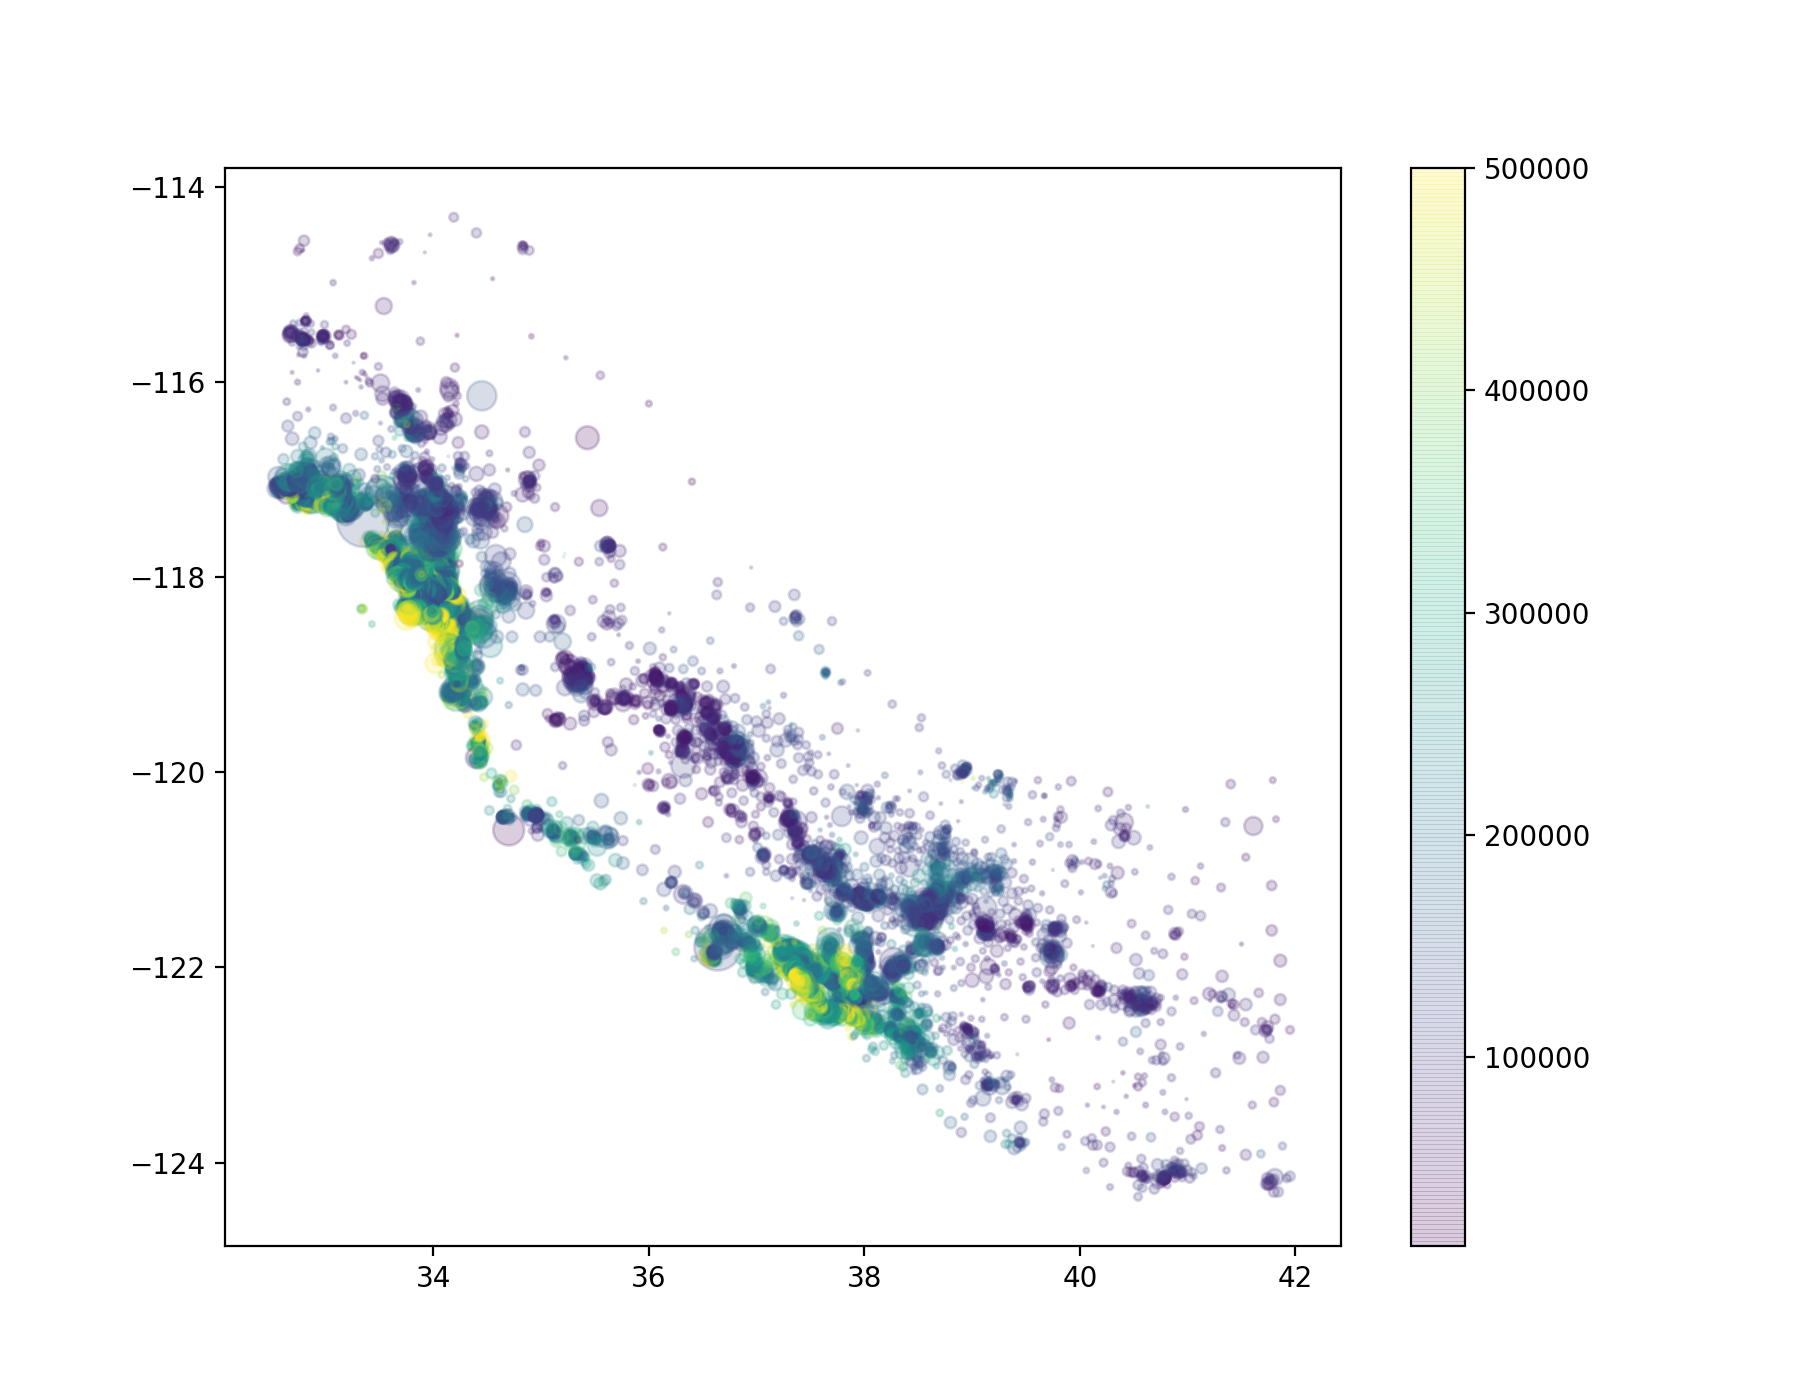

In [4]:
plt.figure(figsize = (9, 7))
plt.scatter(cali.latitude, cali.longitude, alpha = 0.2, c = cali.median_house_value, s = cali.population/100)
plt.colorbar()

### Looking for Relationships

<IPython.core.display.Javascript object>


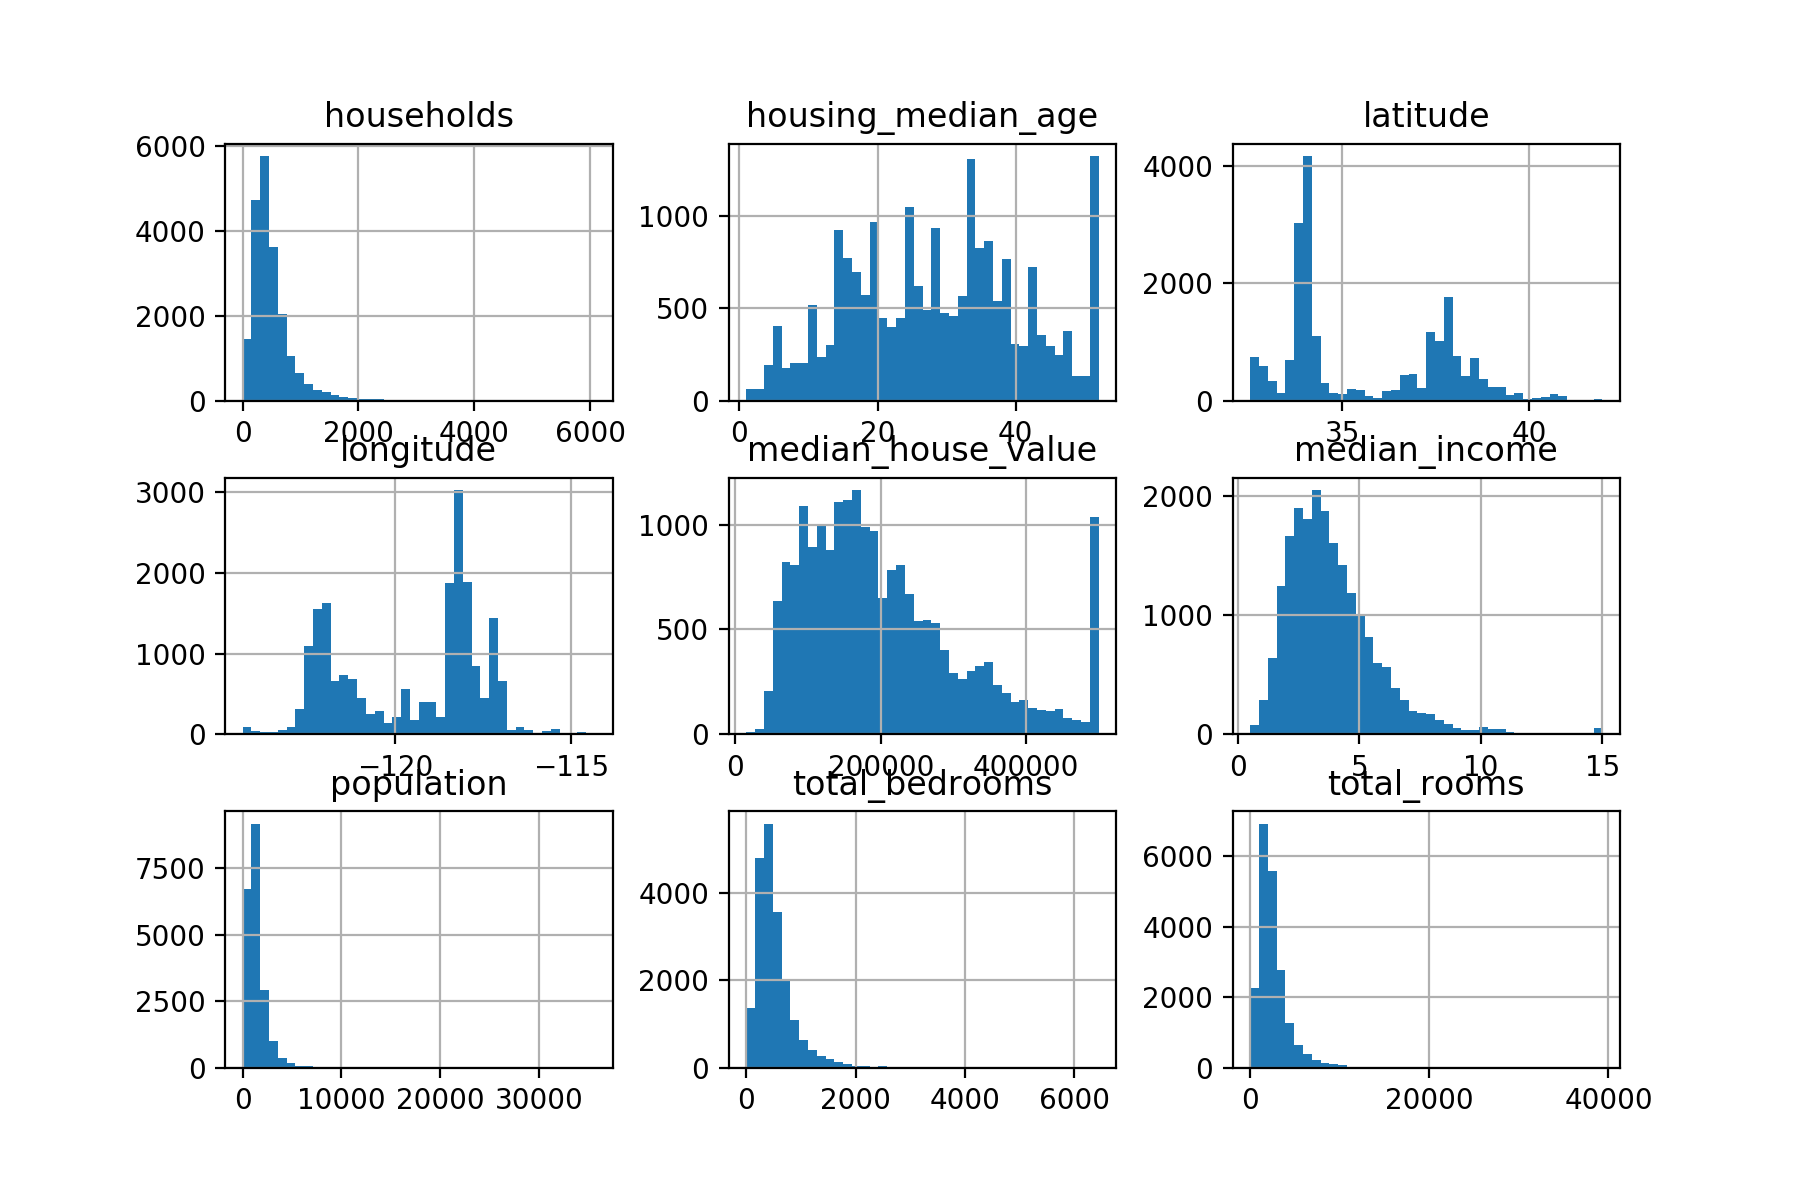

In [5]:
cali.hist(bins = 40, figsize = (9, 6));

### Split the Data

In [6]:
y = cali['median_house_value']
X = cali.drop('median_house_value', axis = 1)
X['total_bedrooms'].fillna(X.total_bedrooms.median(), inplace = True)

In [7]:
X['rooms_per_house'] = X['total_rooms']/X['households']
X['bedrooms_per_room'] = X['total_bedrooms']/X['total_rooms']
X['population_per_household'] = X['population']/X['households']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
len(X_train)

15480

In [9]:
train = X_train.join(y_train)
corr_mat = train.corr()

In [10]:
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.692446
rooms_per_house             0.146540
total_rooms                 0.135967
housing_median_age          0.109737
households                  0.065912
total_bedrooms              0.048238
population_per_household   -0.019157
population                 -0.024819
longitude                  -0.049105
latitude                   -0.141754
bedrooms_per_room          -0.237347
Name: median_house_value, dtype: float64

In [11]:
cali_cols = train[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']]

<IPython.core.display.Javascript object>


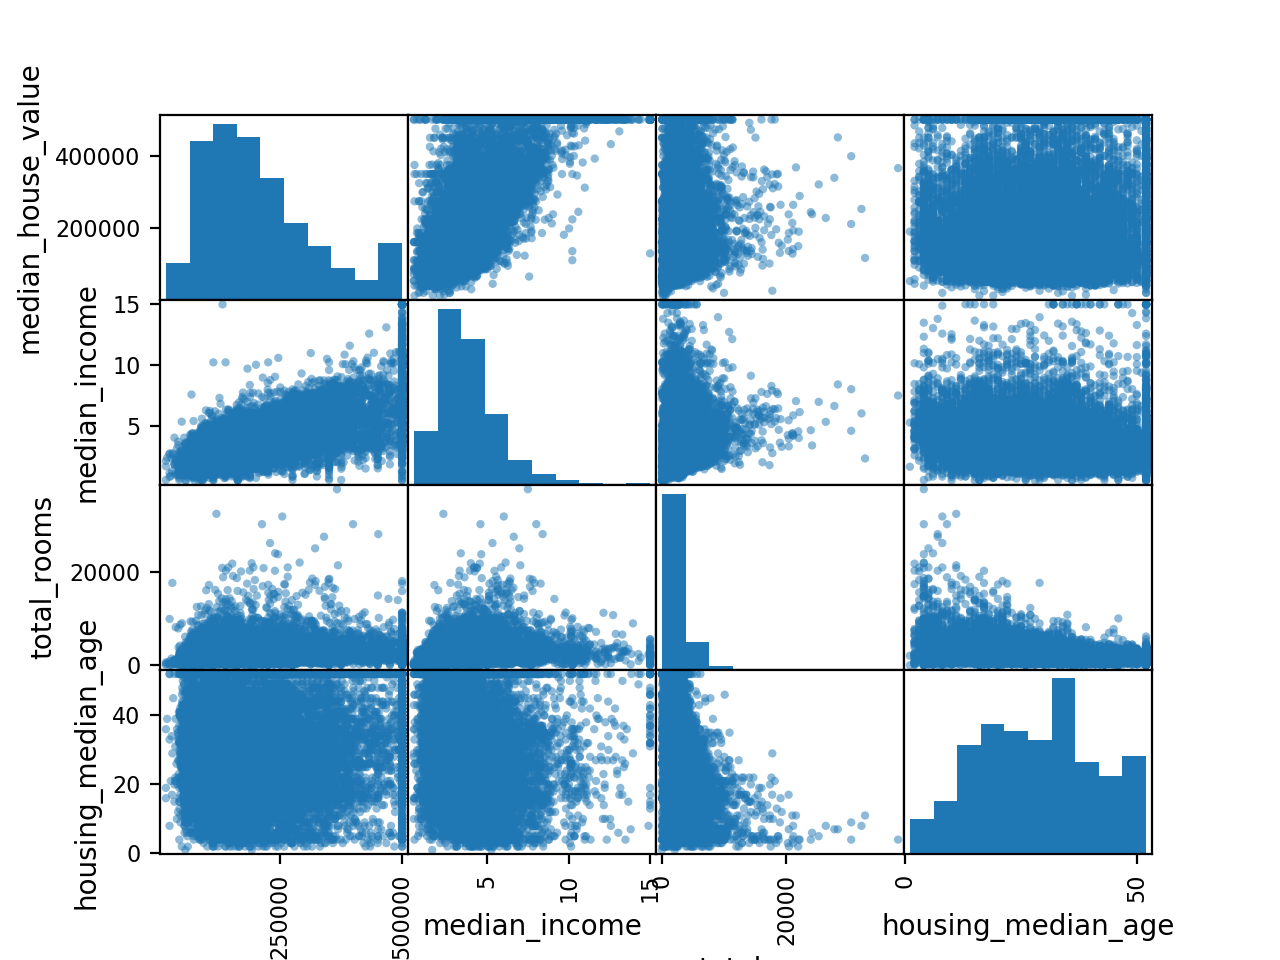

In [12]:
scatter_matrix(cali_cols);

In [13]:
lm = LinearRegression()
X = train['median_income'].values.reshape(-1,1)
y = train['median_house_value']
lm.fit(X,y)
predict = lm.predict(X)
mse = mean_squared_error(predict, y)
np.sqrt(mse)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


83879.29001498857

### Categorical Data

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 18659 to 12949
Data columns (total 13 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
ocean_proximity             15480 non-null object
rooms_per_house             15480 non-null float64
bedrooms_per_room           15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.3+ MB


In [15]:
dummies = pd.get_dummies(train['ocean_proximity'])

In [16]:
train = train.join(dummies)

In [17]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedrooms_per_room',
       'population_per_household', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [18]:
train = train.drop('<1H OCEAN', axis = 1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 18659 to 12949
Data columns (total 17 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
ocean_proximity             15480 non-null object
rooms_per_house             15480 non-null float64
bedrooms_per_room           15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
INLAND                      15480 non-null uint8
ISLAND                      15480 non-null uint8
NEAR BAY                    15480 non-null uint8
NEAR OCEAN                  15480 non-null uint8
dtypes: float64(12), object(1

### Numerical Features

In [20]:
train = train.drop('ocean_proximity', axis = 1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 18659 to 12949
Data columns (total 16 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
rooms_per_house             15480 non-null float64
bedrooms_per_room           15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
INLAND                      15480 non-null uint8
ISLAND                      15480 non-null uint8
NEAR BAY                    15480 non-null uint8
NEAR OCEAN                  15480 non-null uint8
dtypes: float64(12), uint8(4)
memory usage: 2.2 MB


In [22]:
y = train['median_house_value']
X = train.drop('median_house_value', axis = 1)

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipeline = Pipeline([('std_scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree = 2))])

In [26]:
housing_prepared = pipeline.fit_transform(X)

### Model

In [27]:
lm = LinearRegression()
lm.fit(housing_prepared, y)
lm.score(housing_prepared, y)
lm.predict(housing_prepared[:10])

array([255100.10253906, 182860.37207031, 165639.70361328, 274719.65722656,
       111039.82080078, 202970.09912109, 264170.41113281,  93723.34033203,
       251947.02246094, 189035.66601562])

In [28]:
predictions = lm.predict(housing_prepared)

mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

60522.64079739562

### Regularized Models, Cross Validation and Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
lasso = Lasso()
alphas = [0.5, 1, 4, 10, 50, 100]
param_grid = [
    {'alpha': alphas}
]
grid_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.5, 1, 4, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [31]:
grid_search.best_estimator_

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
lasso = grid_search.best_estimator_

In [33]:
lasso.fit(housing_prepared, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
predictions = lasso.predict(housing_prepared)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

60816.33239775075

In [35]:
enet = ElasticNet()
alphas = [0.1, 0.5, 1, 4, 10, 50, 100]
param_grid = [
    {'alpha': alphas}
]
grid_search = GridSearchCV(enet, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.1, 0.5, 1, 4, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
enet = grid_search.best_estimator_
enet.fit(housing_prepared, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
predictions = enet.predict(housing_prepared)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

69412.20264748238

### Evaluate on Test Set

In [38]:
X_test['total_bedrooms'].fillna(X_test.total_bedrooms.median(), inplace = True)

dummies = pd.get_dummies(X_test['ocean_proximity'])
X_test = X_test.join(dummies)
X_test = X_test.drop('ocean_proximity', axis = 1)
y = y_test

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X_test)


enet.fit(X, y)
predictions = enet.predict(X)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

71519.1661659384

In [40]:
lasso.fit(X, y)
predictions = lasso.predict(X)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

67568.17354667038

In [41]:
lm.fit(X, y)
predictions = lm.predict(X)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

67566.53571710721